# Project Overview

This project explores both supervised and unsupervised machine learning techniques to analyze and group vehicles based on a set of numerical features. The dataset consists of various vehicle types with characteristics that help distinguish between categories buses, vans, and cars.

**Supervised Learning:**

 * Models: LogisticRegression, DecisionTree, RandomForest, SVM, XGBoost
 * Model evaluation: using accuracy, confusion matrix, and classification report

**Unsupervised Learning:**

 * PCA for dimensionality reduction
 * K-Means Clustering with Elbow Method and Silhouette Score
 * DBSCAN for density-based clustering



> **This Notebook focuses on processing the raw data to be used in Machine Learning Algorithms.**

**Preprocessing steps**

* Removing missing values
* Normalize numerical features
* Split data into train and test set
* Split data into features and targets
* Reduce dimensions with PCA

**Data extracted for future use**

* `processed_X_train.csv`: train set features, normalized with StandardScaler
* `processed_X_test.csv`: test set features, normalized with StandardScaler
* `processed_y_train.csv`: train set labels
* `processed_y_test.csv`: test set labels
* `processed_features_pca`: data without labels reduced to 7 components with PCA


# Import Liabraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vehicles = pd.read_csv('/content/drive/MyDrive/Data_Projects/Vehicle_Project_Classification/Vehicle_Machine_Learning_Classification/Data/vehicle.csv')

# **Pre-processing**

In [ ]:
# Remove missing values
vehicles.dropna(inplace=True)

In [ ]:
# Normalize features for clustering
scaler = StandardScaler()
vehicles_scaled = scaler.fit_transform(vehicles.drop(columns="class"))
vehicles_scaled = pd.DataFrame(vehicles_scaled, columns=vehicles.drop(columns="class").columns)

In [ ]:
# Split data in train and test set for classification
train, test = train_test_split(vehicles, test_size=0.2, random_state=42)

# Features
X_train = train.drop(columns="class")
y_train = train['class']

# Targets
X_test = test.drop(columns="class")
y_test = test['class']

# Normalize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction with PCA

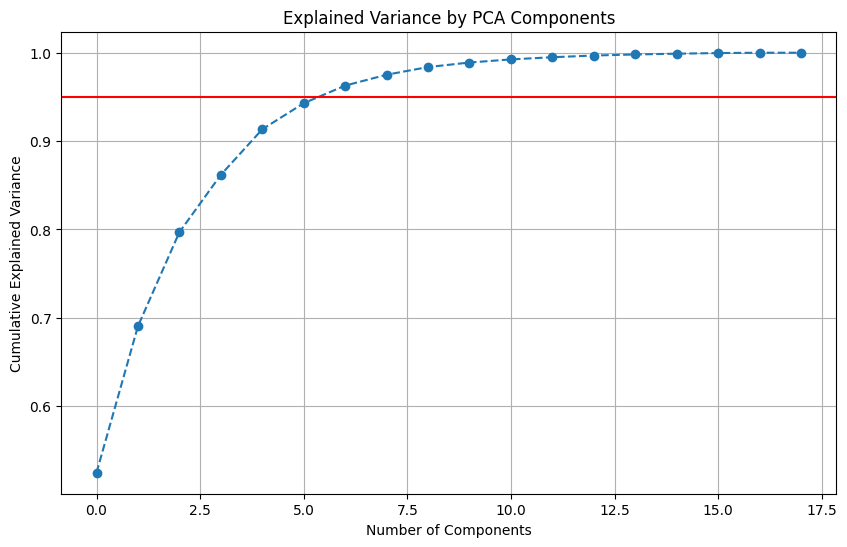

In [ ]:
pca = PCA()
pca.fit(vehicles_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

The PCA cumulative variance plot shows that the first 7 components explain over 95% of the variance. Dimensionality reduction would be possible without significant loss of information.



In [ ]:
pca = PCA(n_components=7)
vehicles_scaled_pca = pca.fit_transform(vehicles_scaled)
vehicles_scaled_pca = pd.DataFrame(vehicles_scaled_pca)
vehicles_scaled_pca.columns = [f"pca_{i}"for i in range(vehicles_scaled_pca.shape[1])]

print(f"Original number of features: {vehicles_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {vehicles_scaled_pca.shape[1]}")
print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_):.5f}")

Original number of features: 18
Reduced number of features after PCA: 7
Cumulative explained variance: 0.96277
